✅ Dataset loaded successfully!

📌 First 5 rows of dataset:
         ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0  

🔎 Missing values before cleaning:
 ph                 491
Hardness             0
Solids            

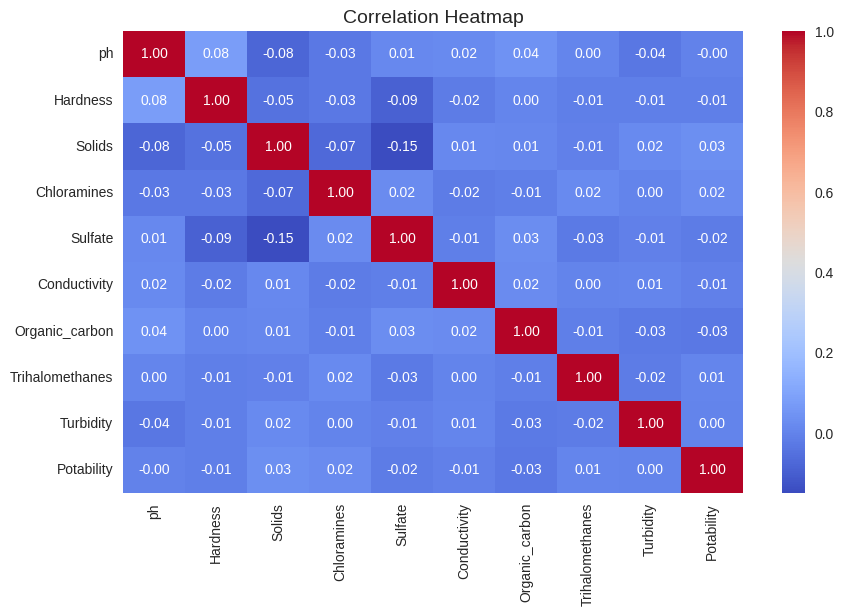

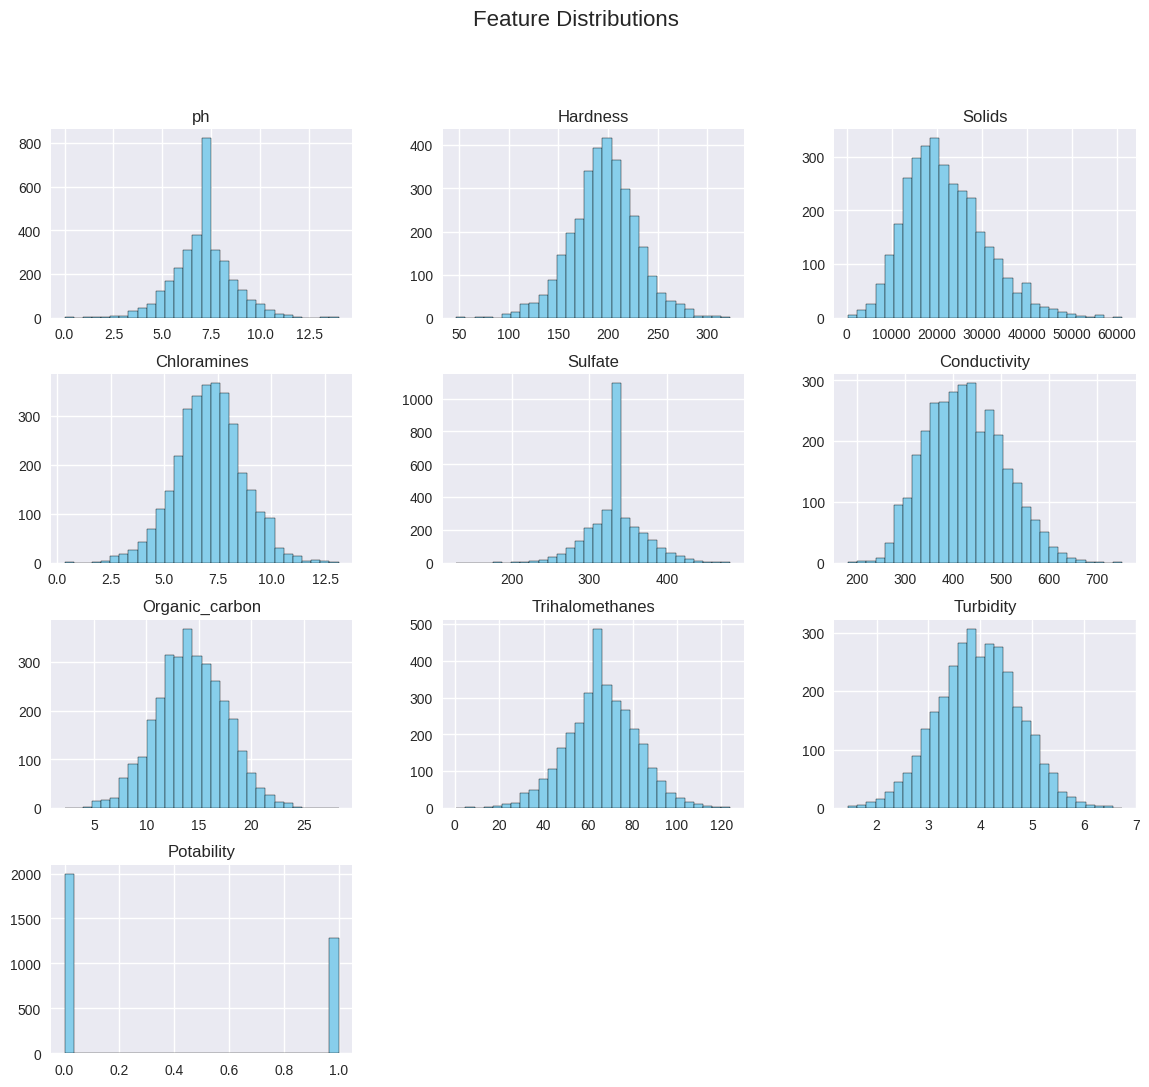

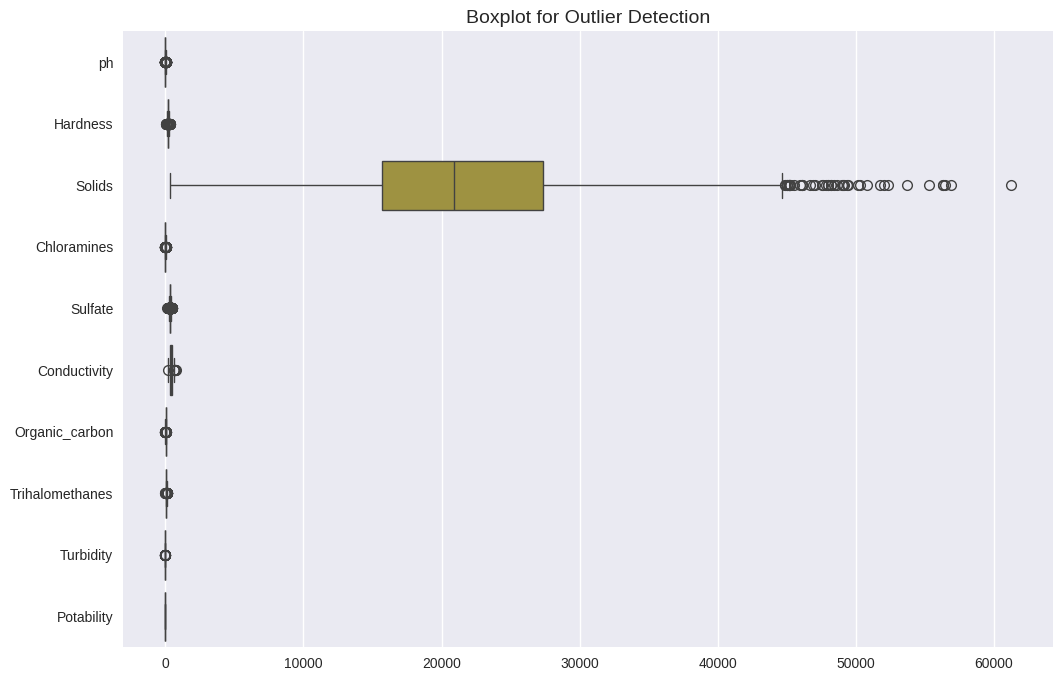

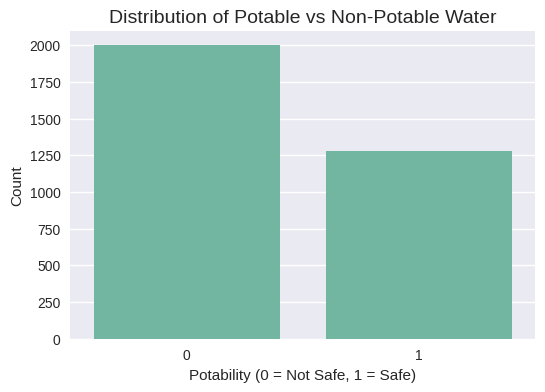

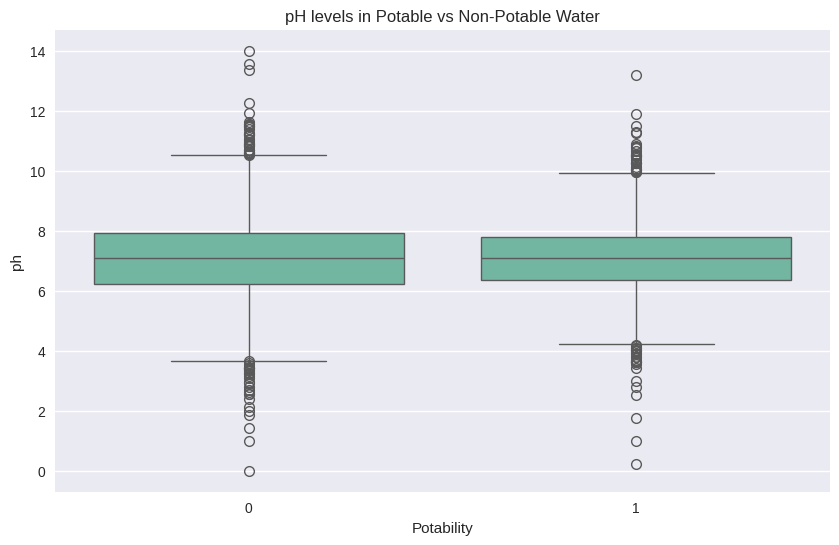

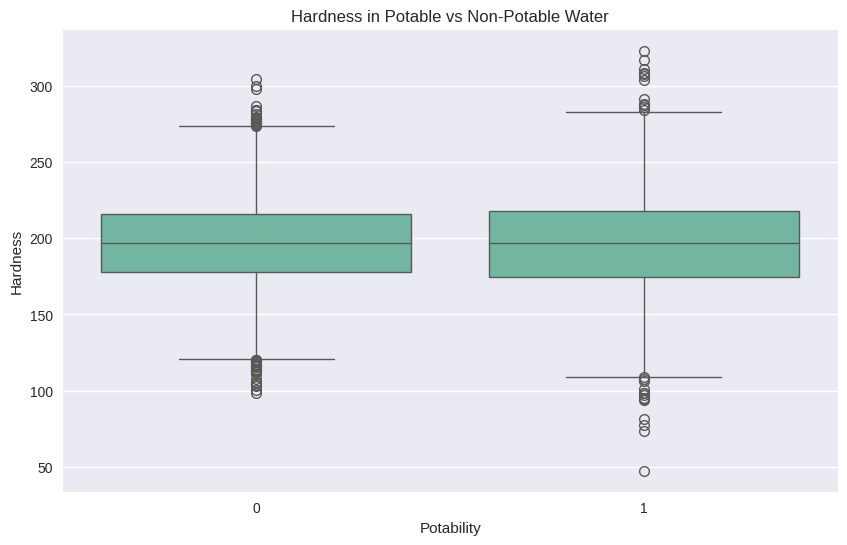


✅ Cleaned dataset saved as 'cleaned_water_potability.csv'

📌 Key Insights from Week 2:
1. Missing values in 'ph', 'Sulfate', and 'Trihalomethanes' were handled using mean imputation.
2. Duplicate rows (if any) were removed to ensure clean data.
3. The dataset is imbalanced: fewer potable (safe) samples compared to non-potable ones.
4. Correlation analysis shows some features influence Potability more than others.
5. Outliers exist in some features (e.g., solids, hardness) → may need handling before modeling.
6. Potable vs Non-Potable distribution visualization confirms dataset imbalance.


In [3]:
# 📘 Week 2 – Water Quality Monitoring Project

# ======================
# 1. Import Libraries
# ======================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Make plots look better
plt.style.use("seaborn-v0_8")
sns.set_palette("Set2")

# ======================
# 2. Load Dataset
# ======================
try:
    df = pd.read_csv("water_potability.csv")
    print("✅ Dataset loaded successfully!")
except FileNotFoundError:
    print("❌ Dataset not found. Please upload 'water_potability.csv'.")

# Preview data
print("\n📌 First 5 rows of dataset:")
print(df.head())

# ======================
# 3. Data Cleaning
# ======================

# Check for missing values
print("\n🔎 Missing values before cleaning:\n", df.isnull().sum())

# Fill missing values with mean (numeric columns only)
for col in ["ph", "Sulfate", "Trihalomethanes"]:
    df[col] = df[col].fillna(df[col].mean())

# Double-check missing values
print("\n✅ Missing values after cleaning:\n", df.isnull().sum())

# Check duplicates
duplicates = df.duplicated().sum()
print(f"\n🔁 Number of duplicate rows: {duplicates}")
if duplicates > 0:
    df = df.drop_duplicates()
    print("✅ Duplicates removed.")

# ======================
# 4. Exploratory Data Analysis (EDA)
# ======================

# Dataset Info
print("\n📊 Dataset Info:")
print(df.info())

print("\n📊 Dataset Description (Statistics):")
print(df.describe())

print(f"\n📊 Dataset Shape: {df.shape[0]} rows × {df.shape[1]} columns")

# ---- Correlation Heatmap ----
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap", fontsize=14)
plt.show()

# ---- Histograms (Feature Distributions) ----
df.hist(figsize=(14,12), bins=30, color='skyblue', edgecolor="black")
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

# ---- Boxplots (Outlier Detection) ----
plt.figure(figsize=(12,8))
sns.boxplot(data=df, orient="h")
plt.title("Boxplot for Outlier Detection", fontsize=14)
plt.show()

# ---- Potable vs Non-Potable Water ----
plt.figure(figsize=(6,4))
sns.countplot(x="Potability", data=df)
plt.title("Distribution of Potable vs Non-Potable Water", fontsize=14)
plt.xlabel("Potability (0 = Not Safe, 1 = Safe)")
plt.ylabel("Count")
plt.show()

# ---- Feature Comparison by Potability ----
plt.figure(figsize=(10,6))
sns.boxplot(x="Potability", y="ph", data=df)
plt.title("pH levels in Potable vs Non-Potable Water")
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(x="Potability", y="Hardness", data=df)
plt.title("Hardness in Potable vs Non-Potable Water")
plt.show()

# ======================
# 5. Save Cleaned Dataset
# ======================
df.to_csv("cleaned_water_potability.csv", index=False)
print("\n✅ Cleaned dataset saved as 'cleaned_water_potability.csv'")

# ======================
# 6. Key Insights
# ======================
print("\n📌 Key Insights from Week 2:")
print("1. Missing values in 'ph', 'Sulfate', and 'Trihalomethanes' were handled using mean imputation.")
print("2. Duplicate rows (if any) were removed to ensure clean data.")
print("3. The dataset is imbalanced: fewer potable (safe) samples compared to non-potable ones.")
print("4. Correlation analysis shows some features influence Potability more than others.")
print("5. Outliers exist in some features (e.g., solids, hardness) → may need handling before modeling.")
print("6. Potable vs Non-Potable distribution visualization confirms dataset imbalance.")
